In [80]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter

Theta = 5
N = 100
beta = 0.95
alpha = (1-beta)/2

def mean(x):
    return sum(x) / len(x);

def dover(x):
    n = len(x)
    xm = max(x)
    l = xm/(1+(1-alpha)**(1/n))
    r = xm/(1+(alpha)**(1/n))
    return (l,r)

def ass_dover_omm(x):
    n = len(x)
    alpha1 = mean(x)
    alpha2 = mean(x**2)
    te = alpha1*2/3
    l = te - 1.3*((alpha2-alpha1**2)/n)**0.5
    r = te + 1.3*((alpha2-alpha1**2)/n)**0.5
    return (l,r)

def ass_dover_mmp(x):
    n = len(x)
    te = mean(x)*2/3
    l = te*(1-2.77/(n**0.5))
    r = te*(1+2.77/(n**0.5))
    return (l,r)

def bootstr_dover(x):
    n = len(x)
    te = max(x)/2
    delta = []
    for i in range(1000):
        delta.append(max([x[random.randint(0,n-1)] for i in range(n)])/2 - te)
    delta.sort()
    d_l = delta[int(alpha*1000)]
    d_r = delta[int((1-alpha)*1000)]
    l = te - d_r
    r = te - d_l
    return (l,r)


In [88]:
x = np.array([(random.uniform(Theta,2*Theta)) for i in range(N)])
inters = [dover(x),ass_dover_omm(x),ass_dover_mmp(x),bootstr_dover(x)]

In [89]:
print(x)
print()
for i in inters:
    print(i)

[8.55741121 6.19576231 5.45447737 7.74992413 9.5495741  5.68231361
 6.6545917  6.44909968 6.13156087 9.75014581 8.83921493 9.78827034
 7.73408498 9.35117217 9.91261258 5.84303269 5.94111741 5.87925541
 6.80845801 5.84866367 7.27694039 9.04373818 8.75657514 6.93702437
 6.37012907 9.38362919 5.07376375 9.84392677 8.19760709 5.69383375
 5.66969764 5.26063883 5.01128944 8.44113398 9.02277273 6.53011271
 5.34885539 5.99598961 6.14998601 8.38374441 5.75848319 7.21566273
 7.85281605 7.28933543 9.02980727 5.48832411 6.34051715 9.42003914
 5.18171383 8.12284889 6.76955022 5.55673844 9.58601834 9.41297915
 8.12378159 9.43388406 6.48299376 5.6439886  5.65209097 7.93604905
 8.76250683 6.82341277 7.06131537 8.56527001 9.42033319 6.34970299
 5.1104585  7.24027613 5.67043389 7.10442405 7.7777182  6.23396027
 7.35542381 7.46520004 5.74781736 6.44188932 7.42044356 7.49365146
 6.46591836 9.28807593 5.50995759 5.90903002 8.19582655 9.86597928
 9.20012656 7.6203953  9.63565978 6.04455401 9.10441705 7.5313

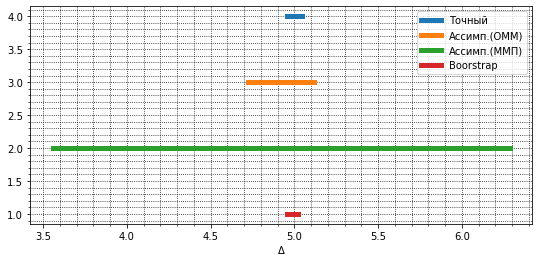

In [94]:
ys = (1,1)

fig, ax = plt.subplots(figsize=(9, 4))
labels = ["Точный","Ассимп.(ОММ)","Ассимп.(ММП)","Boorstrap"]
ax.minorticks_on()
ax.grid(which='major', color = 'k', linestyle = ':')
ax.grid(which='minor', color = 'k', linestyle = ':')
ax.set_xlabel('\u0394')
k = len(inters)
for i in range(k):
    ax.plot(inters[i],(k-i,k-i),linewidth=5.0, label = labels[i])
ax.legend()